# Sentiment Analysis
Sentiment analysis using xgboost classifier
* baseline model
* hyperparameter tuning
* tuned model

## Import and install required libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

## Read dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/IR project/classifier/XGBoost/train_aug.csv')

train_df.head()

,clean_text,manual_label
0,meebit bought eth usd blur meebits meebitsnft,pos
1,check tyler nft weekly preview analyzes market...,neu
2,meebits triple floor check opensea listing flo...,neu
3,clonex sold eth previously sold eth nft collec...,pos
4,mutant ape yacht club sold weth previously sol...,pos


In [4]:
train_df['manual_label'] = train_df['manual_label'].replace('neg',0)

In [5]:
train_df['manual_label'] = train_df['manual_label'].replace('pos',1)

In [6]:
train_df['manual_label'] = train_df['manual_label'].replace('neu',2)

In [7]:
train_df.head()

,clean_text,manual_label
0,meebit bought eth usd blur meebits meebitsnft,1
1,check tyler nft weekly preview analyzes market...,2
2,meebits triple floor check opensea listing flo...,2
3,clonex sold eth previously sold eth nft collec...,1
4,mutant ape yacht club sold weth previously sol...,1


In [8]:
X_train, y_train = train_df['clean_text'], train_df['manual_label']

In [9]:
test_df = pd.read_csv('/content/drive/MyDrive/IR project/classifier/XGBoost/test.csv')

test_df.head()

,clean_text,manual_label
0,day mapo tofu healthy meal mean tofu got ta co...,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu
2,nft lending agreement benddao ethereum reserve...,pos
3,meebit bought eth usd blur meebits meebitsnft,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos


In [10]:
test_df['manual_label'] = test_df['manual_label'].replace('neg',0)

In [11]:
test_df['manual_label'] = test_df['manual_label'].replace('pos',1)

In [12]:
test_df['manual_label'] = test_df['manual_label'].replace('neu',2)

In [13]:
test_df.head()

,clean_text,manual_label
0,day mapo tofu healthy meal mean tofu got ta co...,2
1,azuki room magicwin cryptochazman yasirali nft...,2
2,nft lending agreement benddao ethereum reserve...,1
3,meebit bought eth usd blur meebits meebitsnft,1
4,sold punksticker new owner thanks enjoy nftcol...,1


In [14]:
X_test, y_test = test_df['clean_text'], test_df['manual_label']

In [15]:
vectorizer = TfidfVectorizer(min_df = 1,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [16]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

## Baseline xgboost model

In [31]:
XGB_classifier = XGBClassifier()

XGB_classifier.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [32]:
t0 = time.time()

XGB_classifier = XGBClassifier().fit(X_train_vectorized,y_train)
t1 = time.time()

time_linear_train = t1-t0

In [33]:
print("Training time: %fs" % (time_linear_train))

Training time: 2.088398s


In [34]:
y_pred=XGB_classifier.predict(X_test_vectorized)

In [35]:
print(accuracy_score(y_test, y_pred))

0.8225


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        21
           1       0.91      0.88      0.90       277
           2       0.66      0.74      0.70       102

    accuracy                           0.82       400
   macro avg       0.70      0.71      0.71       400
weighted avg       0.83      0.82      0.83       400



## Hyperparameter tuning

* learning_rate
* max_depth
* n_estimators
* min_child_weight
* subsample 
* colsample_bytree

### learning_rate

In [28]:
param_grid = { 
    "learning_rate": [0.3, 0.1, 0.01]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
grid_search = GridSearchCV(estimator=XGB_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [30]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8470
The best hyperparameters are {'learning_rate': 0.3}


### max_depth

In [34]:
param_grid = { 
    "learning_rate": [0.3],
    "max_depth" : [4, 6, 8, 10]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [35]:
grid_search = GridSearchCV(estimator=XGB_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [36]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8470
The best hyperparameters are {'learning_rate': 0.3, 'max_depth': 6}


### n_estimators

In [37]:
param_grid = { 
    "learning_rate": [0.3],
    "max_depth": [6],
    "n_estimators": [50, 100, 200, 300, 400, 500]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [38]:
grid_search = GridSearchCV(estimator=XGB_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [39]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8488
The best hyperparameters are {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300}


### min_child_weight

In [40]:
param_grid = { 
    "learning_rate": [0.3],
    "max_depth": [6],
    "n_estimators": [300],
    "min_child_weight": [1, 3, 5, 7, 9]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [41]:
grid_search = GridSearchCV(estimator=XGB_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [42]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8488
The best hyperparameters are {'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300}


### subsample

In [43]:
param_grid = { 
    "learning_rate": [0.3],
    "max_depth": [6],
    "n_estimators": [300],
    "min_child_weight": [1],
    "subsample": [0.5, 0.7, 0.9, 1]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [44]:
grid_search = GridSearchCV(estimator=XGB_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [45]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8488
The best hyperparameters are {'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1}


### colsample_bytree

In [46]:
param_grid = { 
    "learning_rate": [0.3],
    "max_depth": [6],
    "n_estimators": [300],
    "min_child_weight": [1],
    "subsample": [1], 
    "colsample_bytree": [0.5, 0.7, 0.9, 1]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [47]:
grid_search = GridSearchCV(estimator=XGB_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [48]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8498
The best hyperparameters are {'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1}


## Tuned xgboost model

In [23]:
t0 = time.time()

XGB_classifier_tuned = XGBClassifier(
    colsample_bytree = 0.9, 
    learning_rate = 0.3, 
    max_depth = 6, 
    min_child_weight = 1, 
    n_estimators = 300, 
    subsample = 1
    ).fit(X_train_vectorized,y_train)
t1 = time.time()

time_linear_train = t1-t0

In [24]:
XGB_classifier_tuned.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.9,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [25]:
print("Training time: %fs" % (time_linear_train))

Training time: 7.029800s


In [26]:
y_pred=XGB_classifier_tuned.predict(X_test_vectorized)

In [27]:
print(accuracy_score(y_test, y_pred))

0.8025


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.48      0.47        21
           1       0.89      0.88      0.88       277
           2       0.65      0.66      0.65       102

    accuracy                           0.80       400
   macro avg       0.66      0.67      0.67       400
weighted avg       0.80      0.80      0.80       400



## Apply on full dataset

In [52]:
df = pd.read_csv('/content/drive/MyDrive/IR project/classifier/XGBoost/full_dataset_final.csv')

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k


In [53]:
df.isnull().values.any()

False

In [54]:
full_vectors = vectorizer.transform(df['clean_text'])

In [55]:
full_prediction_linear = XGB_classifier.predict(full_vectors)

In [56]:
df['xgboost'] = full_prediction_linear.tolist()

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,xgboost
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,1
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,1
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,1
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,1
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,1


In [57]:
df['xgboost'] = df['xgboost'].replace(0,'neg')

In [58]:
df['xgboost'] = df['xgboost'].replace(1,'pos')

In [59]:
df['xgboost'] = df['xgboost'].replace(2,'neu')

In [60]:
total_counts = len(df.index)

total_counts

20295

In [61]:
counts = df['xgboost'].value_counts()

counts

pos    13838
neu     5240
neg     1217
Name: xgboost, dtype: int64

<Axes: >

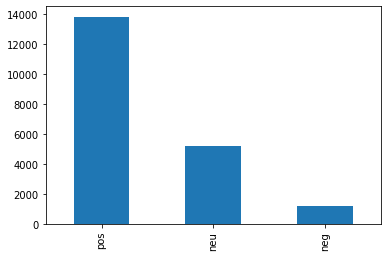

In [62]:
df['xgboost'].value_counts().plot.bar()

In [63]:
df.to_csv('xgboost_full_dataset.csv', index = False)